# Lab: Dimensionality reduction

---
format:
    html:
        embed-resources: true
---

## Get the data and explore

The code below performs the following steps:

- **Imports Libraries**: Imports necessary libraries for data manipulation and visualization (`numpy`, `matplotlib`, `seaborn`, `pandas`).
- **Loads Dataset**: Loads the digits dataset from `sklearn.datasets`.
- **Assigns Data**: Assigns the data to `X` and the target labels to `y`.
- **Prints Shapes**: Prints the shape of the data matrix `X` and the target vector `y`.
- **Defines Visualization Function**: Defines a function `plot_digit` to visualize a digit from the dataset.
- **Visualizes a Digit**: Calls `plot_digit` to display the 100th digit in the dataset using a grayscale colormap.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# get digits data set
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

# explore
print(X.shape)
print(y.shape)


(1797, 64)
(1797,)



`Note on dimensionality:`

* The data is composed of 8x8 images, each imagea can be reshaped into a vector with dimensionality of 64
* Thus the data is a collection of 1797 vectors, each of dimensionality 64

Lets look a a few digits from the dataset

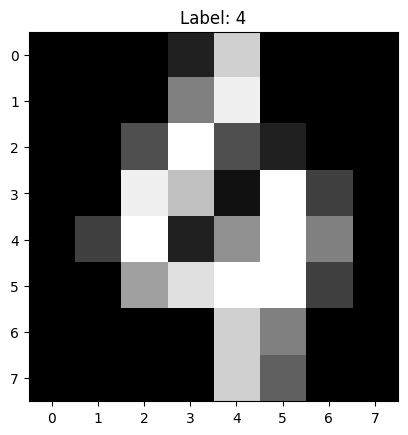

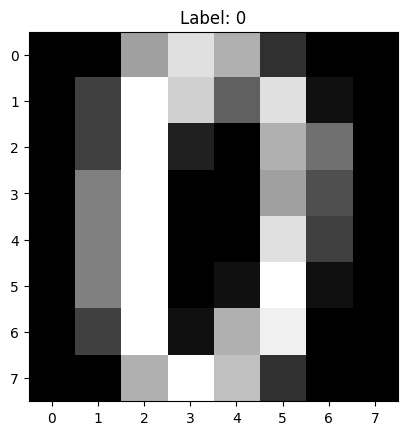

In [4]:

# define a function to visualize a digit
def plot_digit(X,y,i):
    plt.imshow(X[i].reshape(8,8),cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.show()

# visualize a digit
plot_digit(X,y,100)


plot_digit(X,y,30)

## Dimensionality reduction

Before doing clustering lets visualize the data and color code by the "ground truth" labels.

### PCA

In [5]:

# # UTILITY PLOTTING FUNCTION
def plot_2D(X,color_vector):
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='PC-1 ', ylabel='PC-2',
    title='Principal Component Analysis results')
    ax.grid()
    # fig.savefig("test.png")
    plt.show()


(1797, 50)


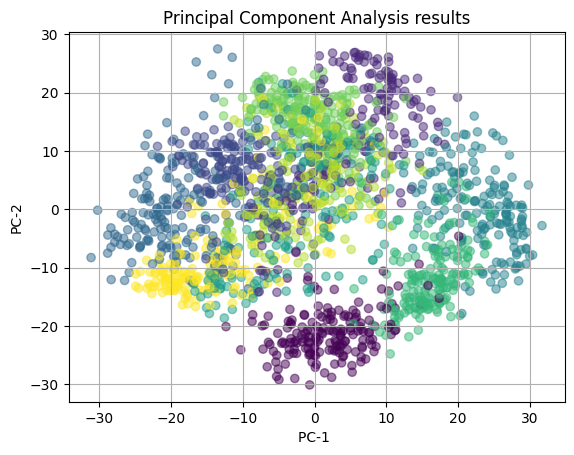

In [6]:

## apply PCA to the data
from sklearn.decomposition import PCA
pca = PCA(n_components=50)

# transform the data
# pca.fit_transform(X) reduces data dimensionality by fitting PCA model and transforming X 
# into principal component space. Principal component space is a transformed feature space where 
# data is represented by orthogonal axes maximizing variance.
X_pca = pca.fit_transform(X)
print(X_pca.shape)

# visualize the results
plot_2D(X_pca,y)



### Assignment: 

In your own words, explain the meaning of the last plot above, and what does it tell us, why is it useful or important.

<!-- INSERT ANSWER HERE -->

Variance explained by each principal component:
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806]

Cumulative variance explained by each principal component:
[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677]


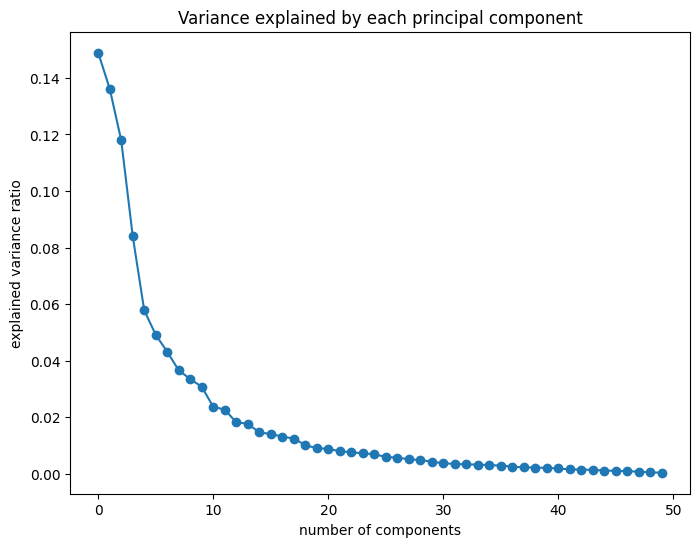

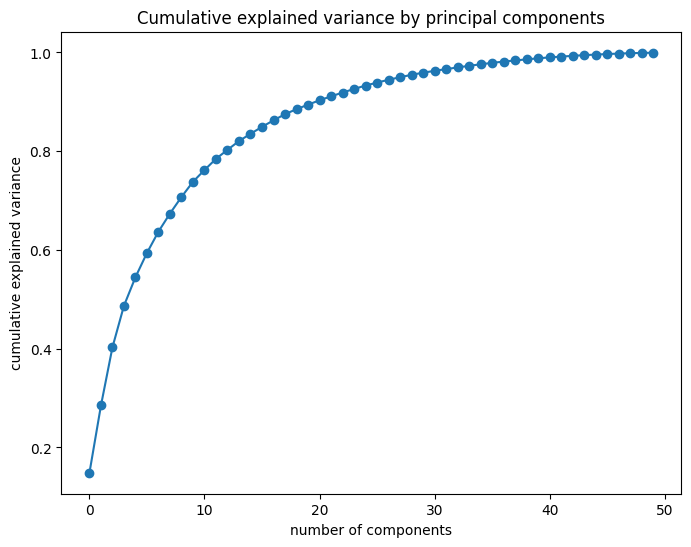

In [7]:
# INSERT CODE TO DO THE FOLLOWING 

# - **Define Variance Plot Function**:
#   - Create a function `plot_variance_explained(pca)` to visualize variance explained by PCA components.
# - **Print Variance Explained**:
#   - Display the variance explained by the first 10 principal components with `pca.explained_variance_ratio_[0:10]`.
#   - Display the cumulative variance explained by the first 10 components with `np.cumsum(pca.explained_variance_ratio_)[0:10]`.
# - **Plot Explained Variance**:
#   - Plot `pca.explained_variance_ratio_` to show variance by each component.
#   - Label x-axis as 'number of components' and y-axis as 'explained variance ratio'.
# - **Plot Cumulative Explained Variance**:
#   - Plot `np.cumsum(pca.explained_variance_ratio_)` to show cumulative variance.
#   - Label x-axis as 'number of components' and y-axis as 'cumulative explained variance'.
# - **Call Function**:
#   - Execute `plot_variance_explained(pca)` to visualize variance results.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data

# Apply PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Print variance explained
explained_variance = pca.explained_variance_ratio_
print("Variance explained by each principal component:")
print(explained_variance[:10])

# Print cumulative variance
cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative variance explained by each principal component:")
print(cumulative_variance[:10]) 

# Define function
def plot_variance_explained(pca):
    explained_variance = pca.explained_variance_ratio_

    # Plot the explained variance ratio for each component
    plt.figure(figsize=(8, 6))
    plt.plot(explained_variance, marker='o')
    plt.xlabel('number of components')
    plt.ylabel('explained variance ratio')
    plt.title('Variance explained by each principal component')
    plt.show()

    # Plot the cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance)
    plt.figure(figsize=(8, 6))
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.title('Cumulative explained variance by principal components')
    plt.show()

# visualize the results
plot_variance_explained(pca)




### Assignment: 

In your own words, explain the meaning of the last two plots above, and why the are important .

<!-- INSERT ANSWER HERE -->

### T-SNE

T-SNE is a technique for dimensionality reduction that is good for visualizing high-dimensional data. It is often used to visualize the results of clustering algorithms.

(1797, 2)


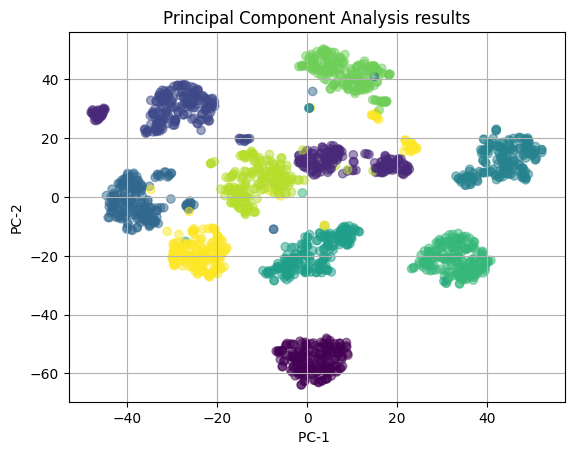

In [8]:

## apply T-SNE to the data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
print(X_tsne.shape)

# visualize the results
plot_2D(X_tsne,y)


### Assignment: 

In your own words, explain the meaning of the last plot above, and what does it tell us, why is it useful or important, compare it to the PCA plot and discuss differences, why do you think these differences exist.

The last chart shows the results of T-SNE, a nonlinear dimensionality reduction technique suitable for visualizing high-dimensional data. Compared to PCA, T-SNE better highlights the separation between different clusters. T-SNE preserves the local structure of the data, making it clearer to display the distances between clusters, whereas PCA emphasizes the explanation of overall variance. This makes T-SNE more suitable for visualizing high-dimensional data with cluster structures.

## Clustering

Dimensionality reductions allows us to visualally attempt to validate the results of clustering algorithms.

We will now cluster the data using KMean and Birch. We will then do PCA and T-SNE on the data to visualize the results.

Notice that the clustering algorithm is being done in 64 dimensions NOT in the reduced 2D space.


OPTIMAL PARAMETER = 9


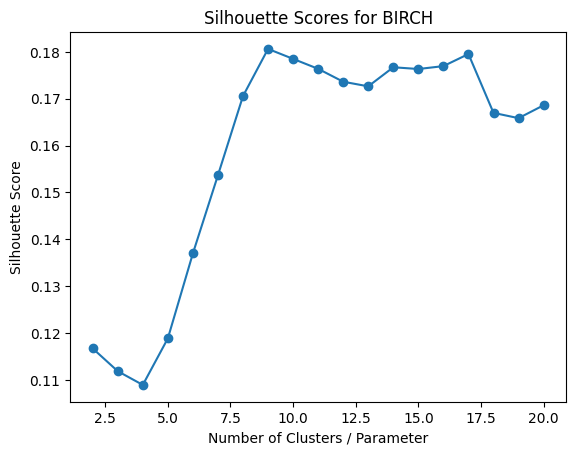

In [9]:
# INSERT CODE TO DO THE FOLLOWING 

# - **Import Necessary Library**: Import `sklearn.cluster` to access clustering algorithms.
# - **Define Optimization Function**:
#   - Create `maximize_silhouette(X, algo="birch", nmax=20, i_plot=False)` to perform grid search over a single hyperparameter.
#   - Set `i_print=False` for debugging (optional).
# - **Force Contiguous Array**: Ensure `X` is contiguous with `np.ascontiguousarray(X)`.
# - **Initialize Variables**:
#   - Use empty lists `params` and `sil_scores` to store parameters and silhouette scores.
#   - Set `sil_max = -10` as an initial silhouette score.
# - **Hyperparameter Search**:
#   - Iterate `param` over a range from `2` to `nmax+1`.
#   - Choose clustering algorithm based on `algo`:
#     - `"birch"`: Set model to `Birch` with `n_clusters=param`.
#     - `"ag"`: Set model to `AgglomerativeClustering` with `n_clusters=param`.
#     - `"dbscan"`: Calculate `eps` as `param * 0.25` and use `DBSCAN`.
#     - `"kmeans"`: Set model to `KMeans` with `n_clusters=param` and `n_init=5`.
#   - Fit model to `X` and retrieve labels.
# - **Compute Silhouette Score**:
#   - Append the silhouette score for each `param` to `sil_scores` list.
#   - Store `param` in `params`.
#   - Track the highest silhouette score and associated parameter with `opt_param` and `opt_labels`.
# - **Print and Plot**:
#   - Output the optimal parameter with `print("OPTIMAL PARAMETER =", opt_param)`.
#   - If `i_plot=True`, generate a plot of silhouette scores vs. parameter values.
# - **Return Optimal Result**: Return `opt_param` and `opt_labels`.

import numpy as np
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_digits

# Load data
digits = load_digits()
X = np.ascontiguousarray(digits.data)

def maximize_silhouette(X, algo="birch", nmax=20, i_plot=False):
    # Initialize variables
    params = []
    sil_scores = []
    sil_max = -1 

    # Hyperparameter search
    for param in range(2, nmax + 1):
        if algo == "birch":
            model = Birch(n_clusters=param)
        elif algo == "ag":
            model = AgglomerativeClustering(n_clusters=param)
        elif algo == "dbscan":
            model = DBSCAN(eps=param * 0.25) 
        elif algo == "kmeans":
            model = KMeans(n_clusters=param, n_init=5)
        
        # Fit the model and retrieve labels
        labels = model.fit_predict(X)
        
        # Only calculate silhouette score if there is more than one cluster
        if len(set(labels)) > 1:
            sil_score = silhouette_score(X, labels)
            sil_scores.append(sil_score)
            params.append(param)
            
            # Track the highest silhouette score and associated parameter
            if sil_score > sil_max:
                sil_max = sil_score
                opt_param = param
                opt_labels = labels

    # Print and plot results
    print("OPTIMAL PARAMETER =", opt_param)
    
    if i_plot:
        import matplotlib.pyplot as plt
        plt.plot(params, sil_scores, marker='o')
        plt.xlabel("Number of Clusters / Parameter")
        plt.ylabel("Silhouette Score")
        plt.title(f"Silhouette Scores for {algo.upper()}")
        plt.show()
    
    return opt_param, opt_labels

# Example usage
optimal_param, optimal_labels = maximize_silhouette(X, algo="birch", nmax=20, i_plot=True)


Lets run the function for KMeans and Birch to attempt to find the optimal number of clusters

OPTIMAL PARAMETER = 9


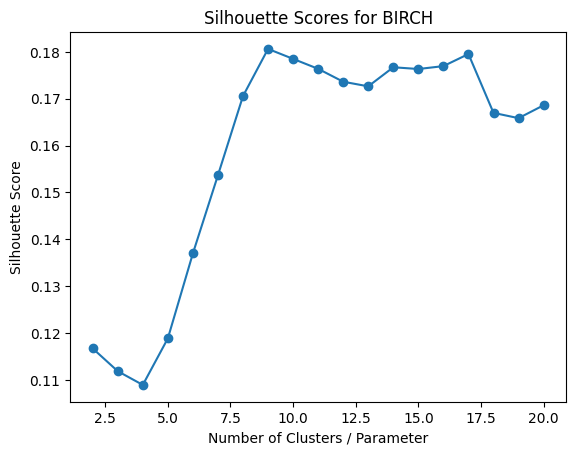

In [10]:
# # BIRCH
opt_param,opt_labels=maximize_silhouette(X,algo="birch",nmax=20, i_plot=True)

OPTIMAL PARAMETER = 9


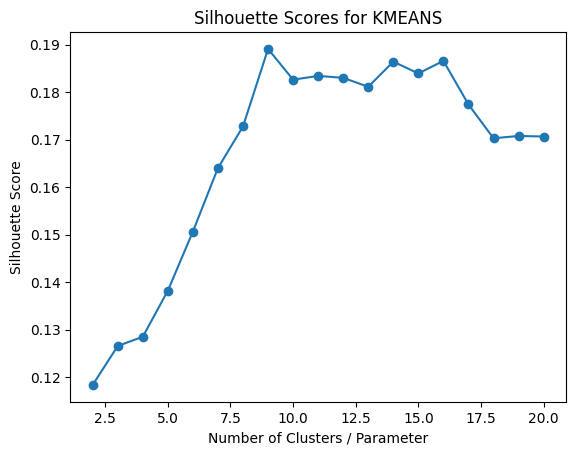

In [11]:
# KMEANS
opt_param,opt_labels=maximize_silhouette(X,algo="kmeans",nmax=20, i_plot=True)


# Retrain the model on the optimal number of clusters


Lets focus on the Kmeans results 

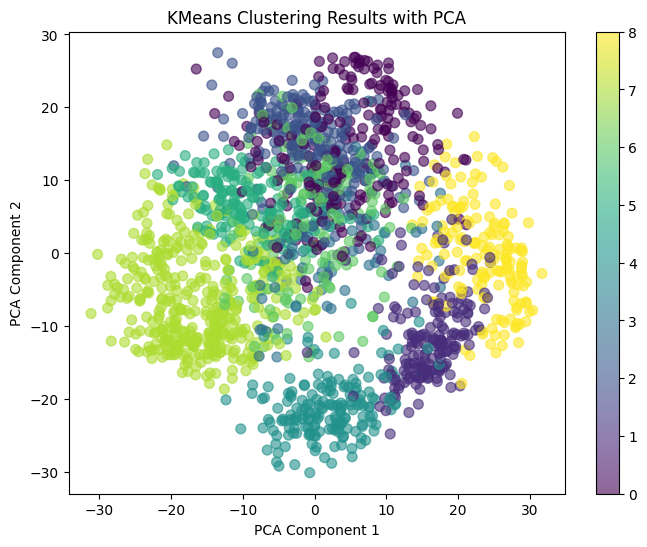

In [ ]:
# Visualize cluster results of kmeans with PCA

digits = load_digits()
X = digits.data

# Train the KMeans model using the optimal number of clusters
optimal_clusters = 9 
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Use PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the KMeans clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar()
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clustering Results with PCA")
plt.show()

CLUSTERING LABELS
[6 7 7 ... 7 3 3]


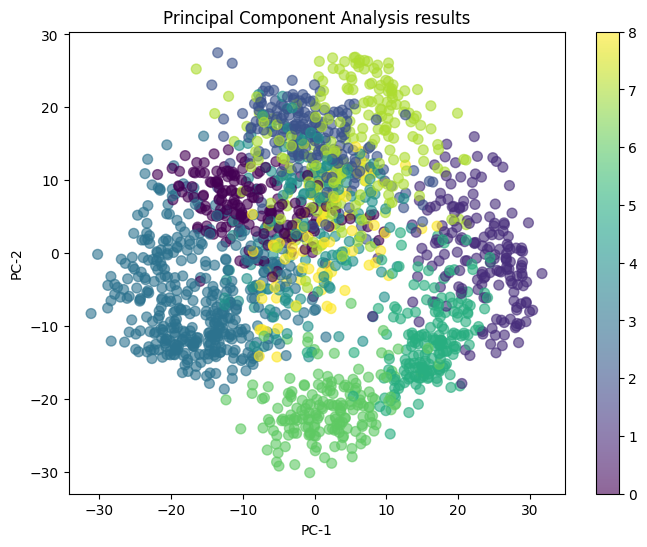

In [13]:
# INSERT CODE TO DO THE FOLLOWING 

# - **Set Up PCA Model**:
#   - Initialize PCA with `n_components=opt_param` to reduce the dimensionality.
# - **Transform Data**:
#   - Use `pca.fit_transform(X)` to transform `X` into principal component space.
#   - Store transformed data in `X_pca`.
# - **Display Clustering Labels**:
#   - Print "CLUSTERING LABELS" as a header for clarity.
# - **Plot 2D Clusters**:
#   - Use `plot_2D(X_pca, opt_labels)` to visualize the clustered data in 2D based on principal components.

digits = load_digits()
X = digits.data

opt_param = 9

# Set up PCA model to reduce dimensionality
pca = PCA(n_components=opt_param)
X_pca = pca.fit_transform(X)

# Train KMeans model on the reduced data
optimal_clusters = 9 
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
opt_labels = kmeans.fit_predict(X_pca)

# Display clustering labels
print("CLUSTERING LABELS")
print(opt_labels)

# Plot the 2D clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=opt_labels, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.xlabel("PC-1")
plt.ylabel("PC-2")
plt.title("Principal Component Analysis results")
plt.show()


TRUE LABELS


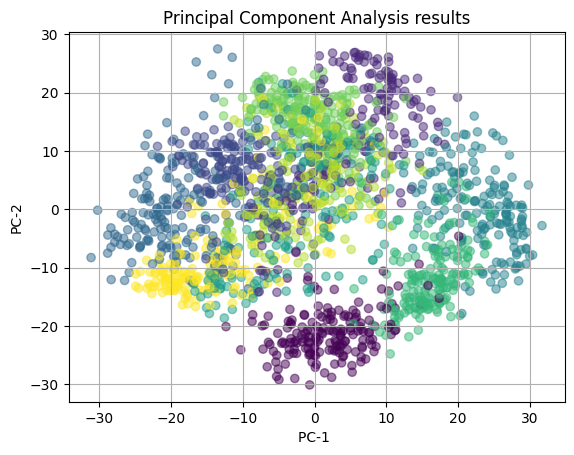

In [14]:
# true labels
print("TRUE LABELS")
plot_2D(X_pca,y)

### Assignment: 

In your own words, explain the meaning of the last two plots above, and what does it tell us, why is it useful or important.

<The last two charts compare the results of KMeans clustering with the true labels. Through the visualization after PCA dimensionality reduction, we can see how the model divides the data into different clusters. This comparison helps us evaluate the quality of the clustering model and understand the degree of matching between the clustering labels and the true labels. If the distribution between the clustering results and the true labels is similar, it indicates that the model has a high accuracy in capturing the data structure.>

They show the quality of the results of the clustering, comparing the true labels to the clustering labels.

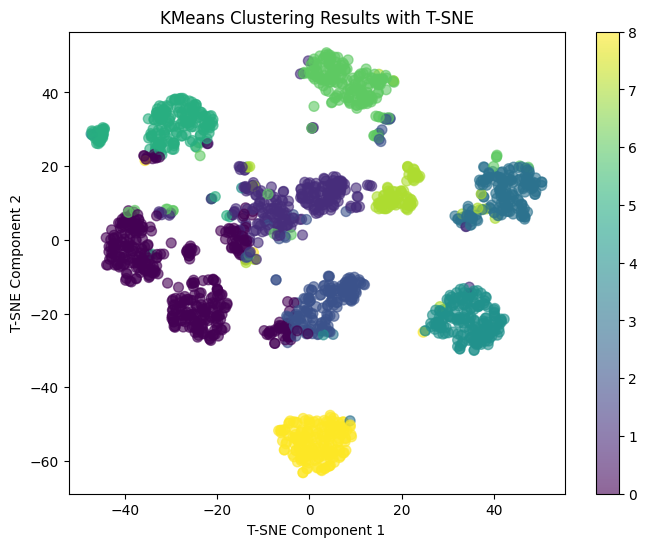

In [15]:
# Visualize cluster results of kmeans with T-SNE

optimal_clusters = 9  
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

# Apply T-SNE 
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot the KMeans clustering results with T-SNE
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.colorbar()
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.title("KMeans Clustering Results with T-SNE")
plt.show()

In [ ]:
# INSERT CODE TO DO THE FOLLOWING 

# - **Initialize t-SNE Model**:
#   - Set up t-SNE with `n_components=2` to reduce data to 2 dimensions.
# - **Transform Data**:
#   - Apply `tsne.fit_transform(X)` to reduce `X` into a 2D t-SNE representation.
#   - Store the result in `X_tsne`.
# - **Display Clustering Labels**:
#   - Print "CLUSTERING LABELS" for clarity.
# - **Plot 2D Clusters**:
#   - Use `plot_2D(X_tsne, opt_labels)` to visualize clustered data in 2D using t-SNE results.

# Train KMeans model
optimal_clusters = 9 
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10)
opt_labels = kmeans.fit_predict(X)

# Initialize t-SNE Model
tsne = TSNE(n_components=2, random_state=42)

# Transform Data
X_tsne = tsne.fit_transform(X)

# Display Clustering Labels
print("CLUSTERING LABELS")
print(opt_labels)

# Plot 2D Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=opt_labels, cmap='viridis', s=50, alpha=0.5)
plt.colorbar()
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.title("KMeans Clustering Results with T-SNE")
plt.show()

TRUE LABELS


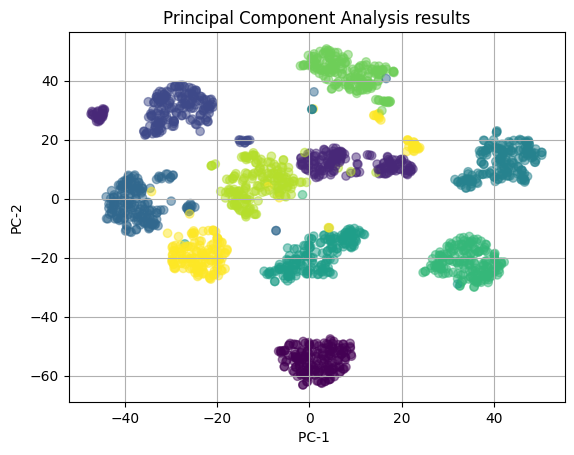

In [ ]:
# true labels
print("TRUE LABELS")
plot_2D(X_tsne,y)

### Assignment: 

In your own words, explain the meaning of the last two plots above, and what does it tell us, why is it useful or important.

These two charts compare the results of KMeans clustering with the true labels. After dimensionality reduction using T-SNE, the first chart shows the cluster labels assigned by KMeans, while the second chart displays the true labels of the data. This comparison helps us evaluate the effectiveness of the clustering model and understand whether the clustering results are close to the true classifications.

They show the quality of the results of the clustering, comparing the true labels to the clustering labels.

